In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train=pd.read_csv('X_train.csv',header=None)
X_test=pd.read_csv('X_test.csv',header=None)
y_train=pd.read_csv('y_train.csv',header=None)
y_test=pd.read_csv('y_test.csv',header=None)

In [3]:
X=X_train.as_matrix()
y=y_train.as_matrix()

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
X.shape

(350, 7)

In [5]:
def ridge(A,b):
    w=[]
    for i in range(0,5000):
        xtx=np.dot(np.transpose(A),A)
        
        lamdi=i*np.identity(xtx.shape[0])
        
        inverse=np.linalg.inv(lamdi+xtx)
        
        temp=np.dot(inverse,np.transpose(A))
        
        wrr=np.dot(temp,b)
        
        w.append(wrr)
    return w
        
    

In [6]:
listw=ridge(X,y)
len(listw)

5000

In [7]:
def degrees(A):
    degreelambda=[]
    for i in range(0,5000):
        U,S,V=np.linalg.svd(A)
        degree=np.sum(np.square(S)/(i+np.square(S)))
        degreelambda.append(degree)
    return degreelambda

In [8]:
listdf=degrees(X)

In [9]:
plt.rcParams["figure.figsize"] = (15,10)

In [10]:
def makeDFPlots(df,wrr):
    plt.figure()
    labels = ["Dimension 1", "Dimension 2", "Dimension 3", "Dimension 4", "Dimension 5", "Dimension 6", "Dimension 7"]
    for i in range(0, 7):
        plt.plot(df,wrr[:,i],label=labels[i])
    plt.xlabel(r"df(lambda)")
    plt.legend(loc='upper left')
    plt.show()

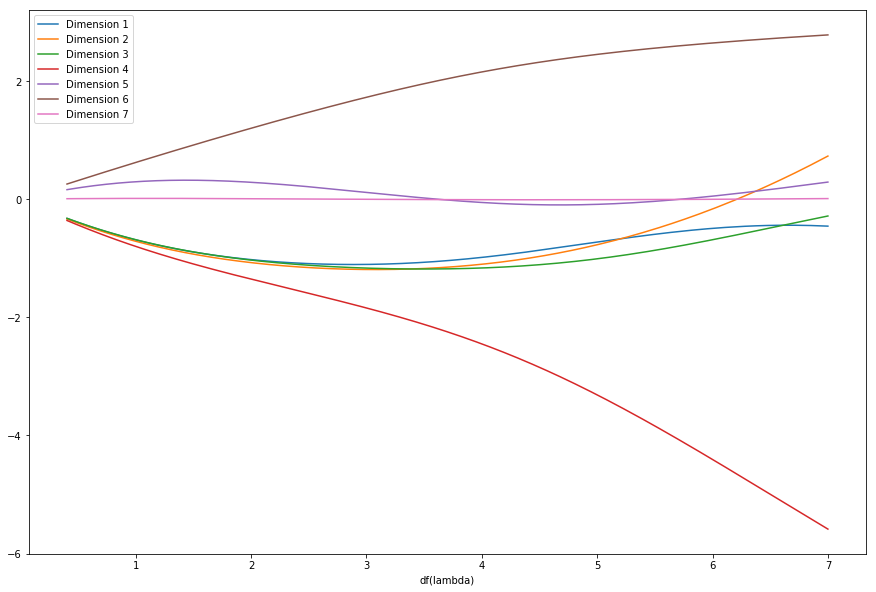

In [11]:
listw = np.asarray(listw)
listdf = np.asarray(listdf)
makeDFPlots(listdf,listw)

In [12]:
X_test=X_test.as_matrix()
y_test=y_test.as_matrix()
y_test.size

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


42

In [13]:
rmse=[]
for i in range(0,50):
    wrr=listw[i]
    y_pred=np.dot(X_test,wrr)
    RMSE=np.sqrt(np.sum(np.square(y_test - y_pred))/len(y_test))
    rmse.append(RMSE)

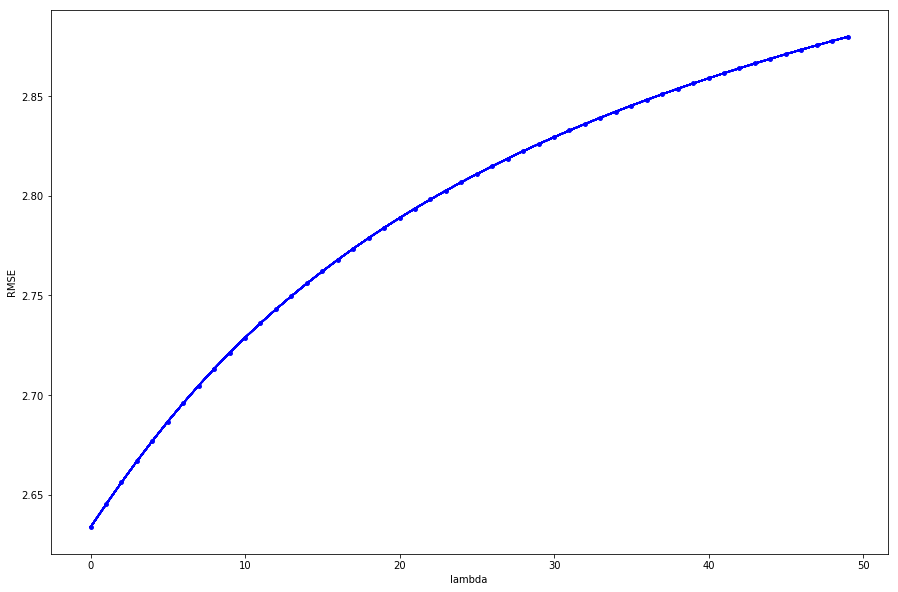

In [14]:
plt.figure()
for i in range(0, 50):
    plt.plot(np.arange(0,50), rmse, color ='blue')
    plt.scatter(i, rmse[i], color ='blue',s=15)
plt.xlabel(r"lambda")
plt.ylabel(r"RMSE")
plt.show()

In [15]:
def stdtrain(A):
    mean=np.mean(A)
    sd=np.std(A)
    for i in range(A.shape[0]):
        A[i]=(A[i]-mean)/sd
    return A,mean,sd

def stdtest(A,mean,sd):
    for i in range(A.shape[0]):
        A[i]=(A[i]-mean)/sd
    return A

In [16]:
a=np.power(X,2)
b=np.power(X_test,2)

In [17]:
X_train2=np.concatenate((X[:,0:6],a),axis=1)
X_test2=np.concatenate((X_test[:,0:6],b),axis=1)
for i in range(6,X_train2.shape[1]-1):
    X_train2[:,i],m2,s2=stdtrain(X_train2[:,i])
    X_test2[:,i]=stdtest(X_test2[:,i],m2,s2)


In [18]:
listw2=ridge(X_train2,y)

In [19]:
len(listw2)

5000

In [20]:
rmse1=[]
for i in range(0,100):
    wrr=listw[i]
    y_pred=np.dot(X_test,wrr)
    RMSE=np.sqrt(np.sum(np.square(y_test - y_pred))/len(y_test))
    rmse1.append(RMSE)

In [21]:
rmse2=[]
for i in range(0,100):
    wrr=listw2[i]
    y_pred=np.dot(X_test2,wrr)
    RMSE=np.sqrt(np.sum(np.square(y_test - y_pred))/len(y_test))
    rmse2.append(RMSE)

    

In [22]:
a2=np.power(X,3)
b2=np.power(X_test,3)

In [23]:
X_train3=np.concatenate((X_train2[:,0:12],a2),axis=1)
X_test3=np.concatenate((X_test2[:,0:12],b2),axis=1)
for i in range(6,X_train3.shape[1]-1):
    X_train3[:,i],m3,s3=stdtrain(X_train3[:,i])
    X_test3[:,i]=stdtest(X_test3[:,i],m3,s3)

In [24]:
listw3=ridge(X_train3,y)
rmse3=[]
for i in range(0,100):
    wrr=listw3[i]
    y_pred=np.dot(X_test3,wrr)
    RMSE=np.sqrt(np.sum(np.square(y_test - y_pred))/len(y_test))
    rmse3.append(RMSE)

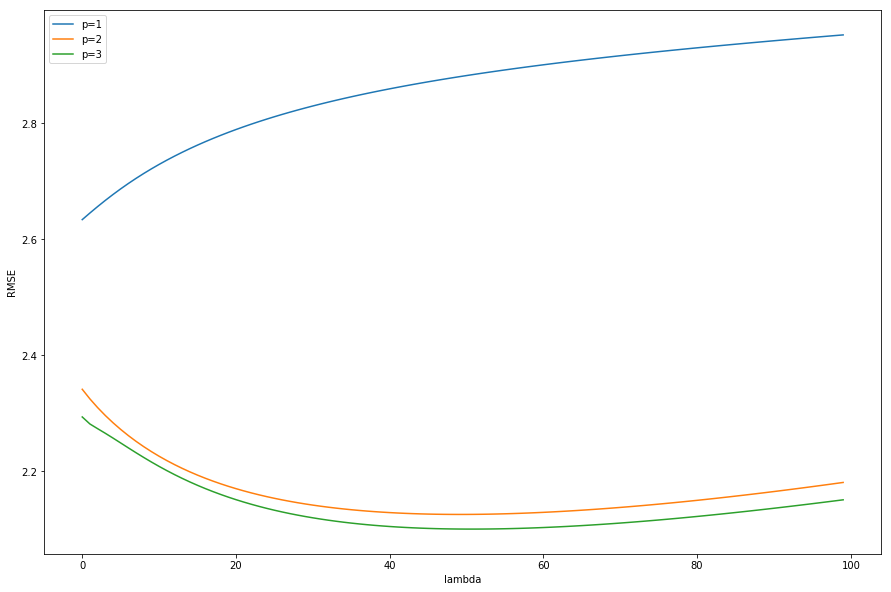

In [25]:
plt.figure()
labels = ["p=1", "p=2", "p=3"]
plt.plot(np.arange(0,100), rmse1,label=labels[0])
plt.plot(np.arange(0,100), rmse2,label=labels[1])
plt.plot(np.arange(0,100), rmse3,label=labels[2])
plt.legend(loc='upper left')
plt.xlabel(r"lambda")
plt.ylabel(r"RMSE")
plt.show()